## Trajectoire et type avion

In [1]:
import pandas as pd
import numpy as np
import ast
import json
from openap import FlightPhase
import matplotlib.pyplot as plt
from openap import Emission, FuelFlow, prop
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def test_segment(labels, ts, alt, spd, roc):

    phasecolors = {
        'GND': 'black',     #ground
        'CL': 'green',      #climb
        'DE': 'blue',       #descend
        'LVL': 'cyan',      #level
        'CR': 'purple',     #cruise (vitesse cste ou alt cste)
        'NA': 'red'         #not available
    }

    colors = [phasecolors[lbl] for lbl in labels]

    plt.subplot(311)
    plt.scatter(ts, alt, marker='.', c=colors, lw=0)
    plt.ylabel('altitude (ft)')

    plt.subplot(312)
    plt.scatter(ts, spd, marker='.', c=colors, lw=0)
    plt.ylabel('speed (kt)')

    plt.subplot(313)
    plt.scatter(ts, roc, marker='.', c=colors, lw=0)
    plt.ylabel('roc (fpm)')

    plt.show()

In [5]:
def trajectory(data, line_nb):
    list_time = data.timestamp_s
    list_tas = data.TAS
    list_alt = data.altitude
    list_rate = data.vertical_rate

    ts = np.array(ast.literal_eval(list_time[line_nb]))
    spd = np.array(ast.literal_eval(list_tas[line_nb]))
    alt = np.array(ast.literal_eval(list_alt[line_nb]))
    roc = np.array(ast.literal_eval(list_rate[line_nb]))

    fp = FlightPhase()
    fp.set_trajectory(ts, alt, spd, roc)
    labels = fp.phaselabel()
    test_segment(labels, ts, alt, spd, roc)

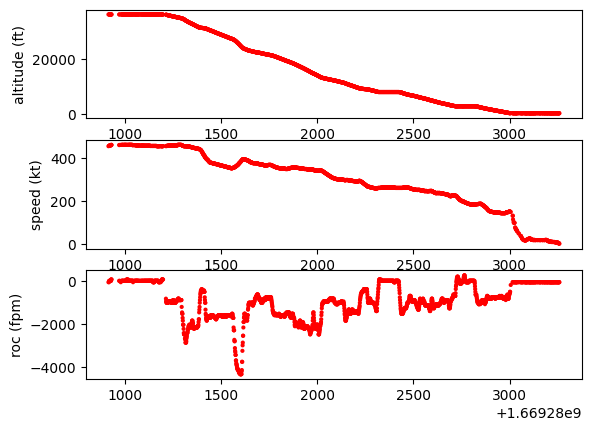

In [7]:
## Load data file : 
data_new_na = pd.read_csv('data11/data_toulouse_25_11.csv')
line_nb = 4
trajectory(data_new_na, line_nb)